In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from collections import Counter
%matplotlib inline
X_train = pd.read_csv('../proj/trx_data.csv')

In [4]:
X_train.head()

,customerId,products
0,0,20
1,1,2|2|23|68|68|111|29|86|107|152
2,2,111|107|29|11|11|11|33|23
3,3,164|227
4,5,2|2


In [5]:
X_train.shape

(32019, 2)

In [6]:
X_train['products'] = X_train['products'].apply(lambda x: [int(i) for i in x.split('|')])
X_train.head().set_index('customerId')['products'].apply(pd.Series).reset_index()

,customerId,0,1,2,3,4,5,6,7,8,9
0,0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2.0,2.0,23.0,68.0,68.0,111.0,29.0,86.0,107.0,152.0
2,2,111.0,107.0,29.0,11.0,11.0,11.0,33.0,23.0,NaN,NaN
3,3,164.0,227.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
X_train_plot = X_train.copy()
X_train_plot['products'] = X_train_plot['products'].apply(lambda x: len(x))

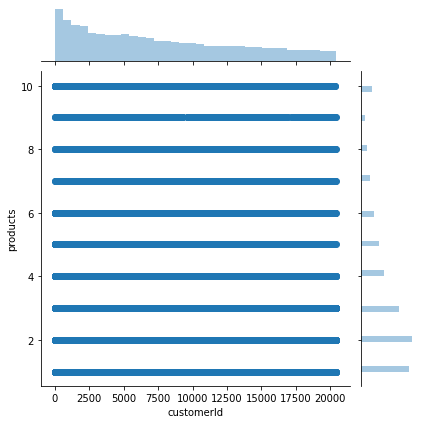

In [8]:
sns.jointplot(x="customerId", y="products", data=X_train_plot)

In [9]:
tot_products=[]
for x in X_train['products']:
    for i in x:
        tot_products.append(i)


cnt= Counter()
for word in tot_products:
    cnt[word] += 1

product_x = list(dict(cnt).keys())
proct_y = list(dict(cnt).values())

<AxesSubplot:>

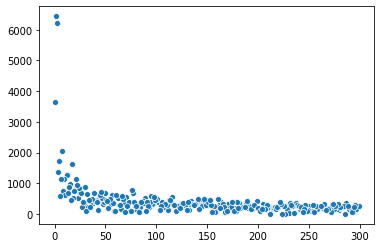

In [10]:
sns.scatterplot(x=product_x, y=proct_y)

<AxesSubplot:>

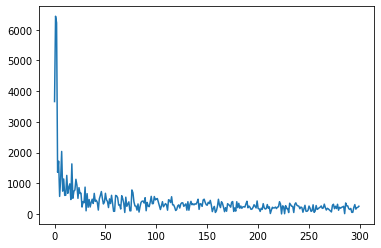

In [11]:
sns.lineplot(x=product_x, y= proct_y)

In [12]:
data = pd.melt(X_train.set_index('customerId')['products'].apply(pd.Series).reset_index(), 
             id_vars=['customerId'],
             value_name='products') \
    .dropna().drop(['variable'], axis=1) \
    .groupby(['customerId', 'products']) \
    .agg({'products': 'count'}) \
    .rename(columns={'products': 'purchase_count'}) \
    .reset_index() \
    .rename(columns={'products': 'productId'})
data['productId'] = data['productId'].astype(np.int64)

In [13]:
print(data.shape)
data.head()

(73180, 3)


,customerId,productId,purchase_count
0,0,20,1
1,0,52,1
2,0,93,3
3,0,216,1
4,0,260,1


In [14]:
df_matrix = pd.pivot_table(data, values='purchase_count', index='customerId', columns='productId',fill_value=0)
df_matrix.head()

productId,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
customerId,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X = pd.DataFrame(index=df_matrix.columns,columns=df_matrix.columns)
X.head()

productId,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
productId,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
from scipy.spatial.distance import cosine

for i in range(0,len(X.columns)) :
    for j in range(0,len(X.columns)) :
        X.iloc[i,j] = 1-cosine(df_matrix.iloc[:,i],df_matrix.iloc[:,j])
        
X.head()

productId,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
productId,,,,,,,,,,,,,,,,,,,,,
0,1,0.23003,0.147693,0.0569638,0.0884363,0.0446699,0.0323073,0.0747176,0.0388392,0.0620817,...,0.00872294,0.0183546,0.00904157,0.00304247,0.0110548,0.0440382,0.0213202,0.0267869,0.0463288,0.0437314
1,0.23003,1,0.238672,0.0970542,0.124946,0.092277,0.0529326,0.126214,0.0653648,0.103653,...,0.0456448,0.0269805,0.0212585,0.0140559,0.0260391,0.0939008,0.0443778,0.0514133,0.0661414,0.0699044
2,0.147693,0.238672,1,0.200814,0.10006,0.0964552,0.0645435,0.110598,0.108316,0.0768618,...,0.0385216,0.0384933,0.0688323,0.0159092,0.0228644,0.0878737,0.0413652,0.0554899,0.092252,0.0370221
3,0.0569638,0.0970542,0.200814,1,0.0541569,0.0253194,0.0173049,0.0519543,0.0546692,0.0297834,...,0.00953533,0.0122951,0.0172964,0.0120715,0.00583382,0.0409621,0.0139437,0.0371831,0.0431211,0.0191022
4,0.0884363,0.124946,0.10006,0.0541569,1,0.0490189,0.0268916,0.104949,0.0334991,0.0269377,...,0.0244743,0.0187266,0.0338244,0.00569092,0.0278082,0.0337942,0.00818038,0.0163608,0.0237169,0.0712931


In [20]:
similar_products = pd.DataFrame(index=X.columns,columns=range(1,7))
for i in range(0,len(X.columns)): 
    similar_products.iloc[i] = X.iloc[i].sort_values(ascending=False)[:6].index
    
print(similar_products)

             1    2   3    4    5    6
productId                             
0            0    1   2   12    4   61
1            1    2   0   21   30   60
2            2    1  14    3   17   21
3            3    2   1  187   21   85
4            4    1   7    2    0   22
...        ...  ...  ..  ...  ...  ...
295        295    1   2   21  100  152
296        296   18  21  181  259    1
297        297  144   2    1  221   21
298        298  110  78  152   94    2
299        299    4   1  242  130  144

[293 rows x 6 columns]


In [21]:
X_train.head()

,customerId,products
0,0,[20]
1,1,"[2, 2, 23, 68, 68, 111, 29, 86, 107, 152]"
2,2,"[111, 107, 29, 11, 11, 11, 33, 23]"
3,3,"[164, 227]"
4,5,"[2, 2]"


In [22]:

def get_recommendations(customer_ID, no_of_recommendations):
    buy_products = list(X_train.loc[customer_ID,:])[1]
    print(buy_products)
    counter= 0
    flag=0
    recommended =[]
    for i in buy_products:
        if(flag==-1):
            break
        similar = list(similar_products.loc[i,:])
        print(similar)
        for j in similar:
            if(j not in buy_products and j not in recommended):
                recommended.append(j)
                counter+=1
            if(counter>=no_of_recommendations):
                flag=-1
                break
    return recommended

In [23]:
get_recommendations(3,5)

[164, 227]
[164, 46, 2, 114, 62, 165]


[46, 2, 114, 62, 165]